In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
import category_encoders as ce
from category_encoders.cat_boost import CatBoostEncoder

In [15]:
df = pd.read_csv("/Users/anushkahegde/Desktop/NEU/IE_7374_Machine_Learning/ml_project/in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [16]:
''' Check for null values '''
df.isna().sum()/df.shape[0] * 100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

In [17]:
'''Drop unnecessary variables'''
df.drop(['car', 'direction_same', 'toCoupon_GEQ5min'], axis=1, inplace=True)

In [5]:
df['CoffeeHouse'].value_counts() # analyse the most frequent category
#df['CoffeeHouse'].isna().sum() 217 missing values 
''' NAN values form less than 2% of the values in the columns of the dataset. Therefore, the missing values have been 
imputed with the most common category in each column '''

' NAN values form less than 2% of the values in the columns of the dataset. Therefore, the missing values have been \nimputed with the most common category in each column '

In [18]:
df['temperature'] = df['temperature'].astype(str)
df['temperature']

0        55
1        80
2        80
3        80
4        80
         ..
12679    55
12680    55
12681    30
12682    30
12683    80
Name: temperature, Length: 12684, dtype: object

In [13]:
df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [19]:
'''Impute missing values with mode'''
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_opp           0
Y                       0
dtype: int64

In [44]:
'''Create dummies and split data'''
df_ohe = pd.get_dummies(df)
X, y = df_ohe.drop(['Y'], axis=1), df_ohe['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
X_train

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
9928,0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
9821,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
7795,0,1,0,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
10502,0,1,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1901,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12149,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
746,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
6780,1,0,0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
577,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [9]:
''' CatBoostEncoder data'''
X, y = df.drop(['Y'], axis=1), df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
cbe_encoder = CatBoostEncoder(drop_invariant=True)
cbe_encoder.fit(X_train, y_train)
train_cbe = cbe_encoder.transform(X_train)
test_cbe = cbe_encoder.transform(X_test)
test_cbe

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp
12493,0.513115,0.522559,0.451289,0.513132,0.511530,0.498913,0.493666,0.547217,0.592423,0.547208,...,0.619257,0.593272,0.616605,0.455694,0.578288,0.583395,0.558258,1,0,1
7508,0.628509,0.670088,0.591848,0.598346,0.662840,0.437116,0.493666,0.547217,0.583423,0.547208,...,0.547670,0.576007,0.527180,0.653823,0.580601,0.583395,0.558258,1,0,1
10212,0.628509,0.591376,0.591848,0.540033,0.662840,0.408535,0.622234,0.547217,0.550341,0.540257,...,0.557212,0.583824,0.564977,0.533460,0.569919,0.583395,0.558258,0,0,1
7714,0.628509,0.670088,0.591848,0.513132,0.511530,0.699390,0.493666,0.547217,0.550341,0.608860,...,0.547670,0.583824,0.527180,0.629699,0.569919,0.583395,0.558258,0,0,1
2403,0.491464,0.522559,0.591848,0.540033,0.491464,0.408535,0.622234,0.547217,0.492511,0.540257,...,0.580767,0.494078,0.527180,0.455694,0.578288,0.612402,0.558258,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,0.628509,0.670088,0.591848,0.598346,0.599071,0.728859,0.493666,0.547217,0.592423,0.540257,...,0.648392,0.543906,0.527180,0.653823,0.580601,0.556375,0.558258,1,0,1
9752,0.628509,0.670088,0.591848,0.598346,0.511530,0.498913,0.622234,0.547217,0.492511,0.540257,...,0.515901,0.583824,0.527180,0.533460,0.578288,0.556375,0.594900,1,0,1
9317,0.628509,0.670088,0.591848,0.540033,0.599071,0.699390,0.493666,0.547217,0.574174,0.506201,...,0.619257,0.598494,0.527180,0.653823,0.580601,0.556375,0.594900,1,0,1
7474,0.513115,0.522559,0.451289,0.513132,0.511530,0.437116,0.493666,0.547217,0.550341,0.547208,...,0.558617,0.593272,0.527180,0.455694,0.490241,0.535532,0.497595,0,0,1


In [25]:
pd.crosstab(df['Y'], df['coupon'])

coupon,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
Y,,,,,
0,1190,633,2001,834,816
1,827,1760,1995,658,1970


In [47]:
X_train.shape

(8498, 23)

Epoch 1/50
389/389 - 2s - loss: 0.0551 - val_loss: 0.0288 - 2s/epoch - 6ms/step
Epoch 2/50
389/389 - 1s - loss: 0.0222 - val_loss: 0.0191 - 1s/epoch - 3ms/step
Epoch 3/50
389/389 - 1s - loss: 0.0155 - val_loss: 0.0141 - 1s/epoch - 3ms/step
Epoch 4/50
389/389 - 2s - loss: 0.0126 - val_loss: 0.0127 - 2s/epoch - 4ms/step
Epoch 5/50
389/389 - 1s - loss: 0.0114 - val_loss: 0.0115 - 1s/epoch - 3ms/step
Epoch 6/50
389/389 - 1s - loss: 0.0109 - val_loss: 0.0112 - 1s/epoch - 3ms/step
Epoch 7/50
389/389 - 1s - loss: 0.0106 - val_loss: 0.0107 - 1s/epoch - 3ms/step
Epoch 8/50
389/389 - 2s - loss: 0.0101 - val_loss: 0.0107 - 2s/epoch - 4ms/step
Epoch 9/50
389/389 - 1s - loss: 0.0097 - val_loss: 0.0102 - 1s/epoch - 4ms/step
Epoch 10/50
389/389 - 1s - loss: 0.0093 - val_loss: 0.0094 - 1s/epoch - 3ms/step
Epoch 11/50
389/389 - 1s - loss: 0.0089 - val_loss: 0.0092 - 1s/epoch - 4ms/step
Epoch 12/50
389/389 - 1s - loss: 0.0085 - val_loss: 0.0088 - 1s/epoch - 3ms/step
Epoch 13/50
389/389 - 2s - loss: 0.00

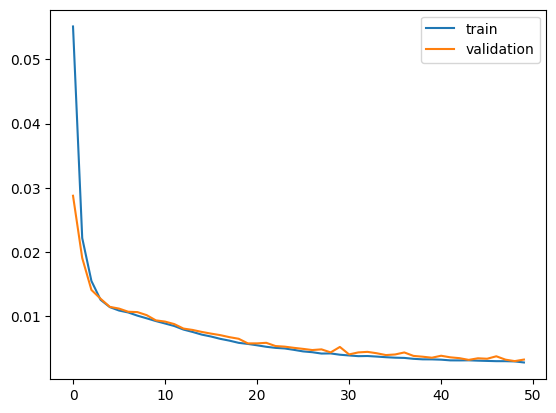

In [46]:
n_inputs = X.shape[1]

# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs+50)(visible)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(e)
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs+50)(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_valid,X_valid))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
#plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [52]:
# load the model from file
#encoder = load_model('encoder.h5')
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the valid data
X_valid_encode = encoder.predict(X_valid)
# encode the test data
X_test_encode = encoder.predict(X_test)

119/119 [==============================] - 0s 3ms/step


(3806, 54)

In [45]:
'''Logistic Regression Model on original data'''
# define model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)

0.6870520783564262 0.7141185647425897 0.7603820598006644


In [40]:
'''Logistic Regression on catboost encoded data'''
# define model
model = LogisticRegression(solver='lbfgs', max_iter=100)
# fit model on training set
model.fit(train_cbe, y_train)
# make prediction on test set
yhat = model.predict(test_cbe)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)

0.6872909698996655 0.7140631086871835 0.7612126245847176


/Users/anushkahegde/opt/anaconda3/envs/projectVenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_valid_encode)
# calculate classification accuracy
acc = accuracy_score(y_valid, yhat)
pr = precision_score(y_valid, yhat)
recall = recall_score(y_valid, yhat)
print(acc, pr, recall)

yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)


0.6745495495495496 0.6994364433312461 0.742686170212766
0.684445612191277 0.7137931034482758 0.7551299589603283


In [12]:
'''Categorical NB on original data Model'''
# define model
model = CategoricalNB()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)

NameError: name 'CategoricalNB' is not defined

In [47]:
'''Bernoulli NB on original data Model'''
# define model
model = BernoulliNB()
# fit model on training set
model.fit(X_train, y_train)
# make prediction on test set
yhat = model.predict(X_test)
# calculate accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)

0.6576684185379837 0.7045740663029795 0.6972591362126246


In [48]:
model = BernoulliNB()
# fit the model on the training set
model.fit(X_train_encode, y_train)
# make predictions on the test set
yhat = model.predict(X_test_encode)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall) # false positives are higher 

0.6256569517439082 0.6592199924271109 0.7230066445182725


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_cbe ,y_train)
y_pred= knn.predict(test_cbe)
accuracy_score(y_pred,y_test)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)

NameError: name 'yhat' is not defined

In [39]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(alpha=0)
clf.fit(train_cbe, y_train)
yhat = clf.predict(test_cbe)
# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
pr = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
print(acc, pr, recall)

0.6870520783564262 0.725925925925926 0.7325581395348837


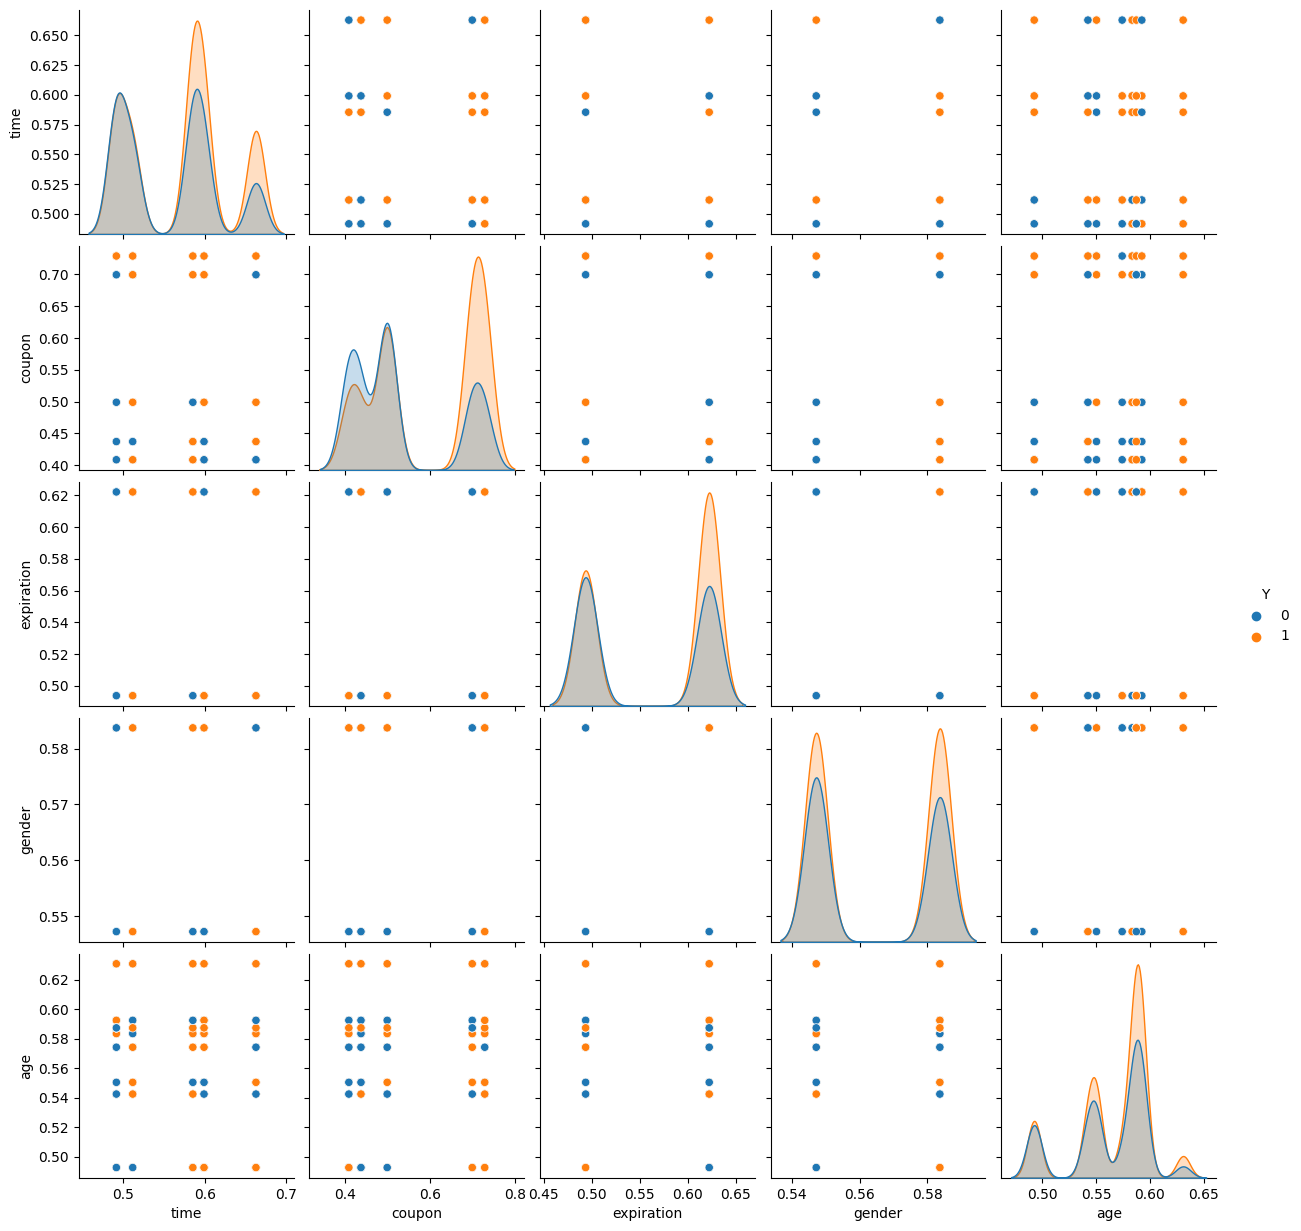

In [12]:
import seaborn as sns
df_cbe = train_cbe.join(y_train)
cols = ['time', 'coupon',
       'expiration', 'gender', 'age', 'Y']
sns.pairplot(df_cbe[cols], hue='Y')
# df_cbe.describe().transpose()
# df_cbe.loc[:,['toCoupon_GEQ15min',
#        'toCoupon_GEQ25min', 'direction_opp']]
